In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

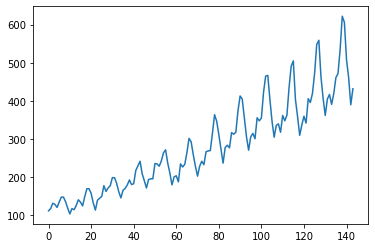

In [2]:
# 做时序图观察基本的趋势和周期
data = pd.read_csv('AirPassengers.csv')
ts = data['#Passengers']
plt.plot(ts)

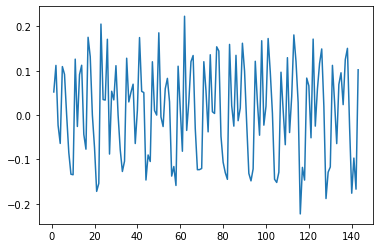

In [3]:
# 分析平稳性，正态性，周期性；并对数据进行转换
ts_log = np.log(ts)
ts_diff = ts_log.diff(1) 
ts_diff = ts_diff.dropna() 
plt.plot(ts_diff)

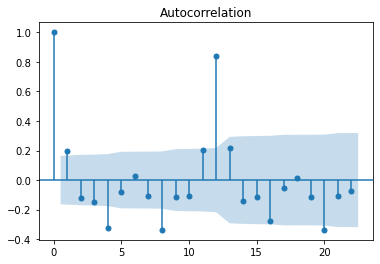

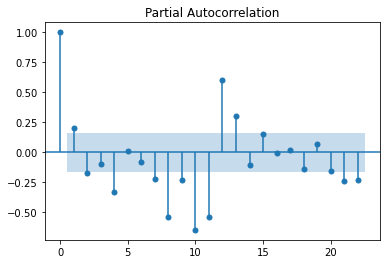

In [4]:
# 做自相关和偏自相关图，确定模型阶次
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f = plot_acf(ts_diff)
f = plot_pacf(ts_diff, method='ols')

D:\Anacondafolds\installfiles\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


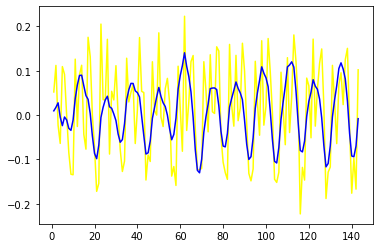

In [5]:
# 训练模型
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff, color='#ffff00')
plt.plot(results_ARIMA.fittedvalues, color='#0000ff')

In [6]:
# 转换回原始波形
pred_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_diff_cumsum = pred_diff.cumsum()
pred_log = pd.Series(ts_log.ix[0], index=ts_log.index)
pred_log = pred_log.add(pred_diff_cumsum,fill_value=0)
pred = np.exp(pred_log)
plt.plot(ts)
plt.plot(pred)

AttributeError: 'Series' object has no attribute 'ix'